# Python for Data Science: Final Project

In this project, an open dataset from the site <a href="https://www.kaggle.com/wosaku/crime-in-vancouver">Crime in Vancouver</a> is being used.

## Exploratory data analysis

Preliminary explore the records (rows) and fields (columns)

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors

from collections import Counter

import folium
from folium import Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data_raw = pd.read_csv('./final_project_data/1929_6405_bundle_archive/crime.csv')
print(data_raw.shape)

data = data_raw.dropna()
print(len(data))

data.head(2)

(530652, 12)
474015


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
# all type of crimes
print(len(data.TYPE.unique()))
Counter(data.TYPE)

9


Counter({'Other Theft': 52160,
         'Break and Enter Residential/Other': 60856,
         'Mischief': 70157,
         'Break and Enter Commercial': 33841,
         'Theft from Vehicle': 170889,
         'Vehicle Collision or Pedestrian Struck (with Injury)': 21887,
         'Vehicle Collision or Pedestrian Struck (with Fatality)': 254,
         'Theft of Vehicle': 38351,
         'Theft of Bicycle': 25620})

In [4]:
# number of records containing theft of bicycle
data[data.TYPE.str.contains('Theft of Bicycle')].shape

(25620, 12)

In [5]:
# all neighbourhoods
print(len(data.NEIGHBOURHOOD.unique()))
Counter(data.NEIGHBOURHOOD)

24


Counter({'Strathcona': 20917,
         'Kerrisdale': 7447,
         'Dunbar-Southlands': 7746,
         'Grandview-Woodland': 27180,
         'Sunset': 17395,
         'West End': 41352,
         'Central Business District': 110945,
         'Hastings-Sunrise': 18126,
         'Victoria-Fraserview': 10818,
         'Fairview': 32161,
         'Kensington-Cedar Cottage': 24941,
         'West Point Grey': 5870,
         'Shaughnessy': 5426,
         'Renfrew-Collingwood': 26761,
         'Killarney': 10475,
         'Riley Park': 12520,
         'Arbutus Ridge': 6066,
         'Musqueam': 532,
         'Mount Pleasant': 30534,
         'Kitsilano': 26698,
         'Stanley Park': 3775,
         'South Cambie': 5212,
         'Marpole': 13083,
         'Oakridge': 8035})

In [6]:
# unique street block of all crime incidents
len(data.HUNDRED_BLOCK.unique())

21192

In [7]:
# unique street block of theft of bicycle
len(data[data.TYPE.str.contains('Theft of Bicycle')].HUNDRED_BLOCK.unique())

5490

Explore patterns of vehicle collision and pedestrian struck relative to year, month, day, hour

/home/ornwipa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


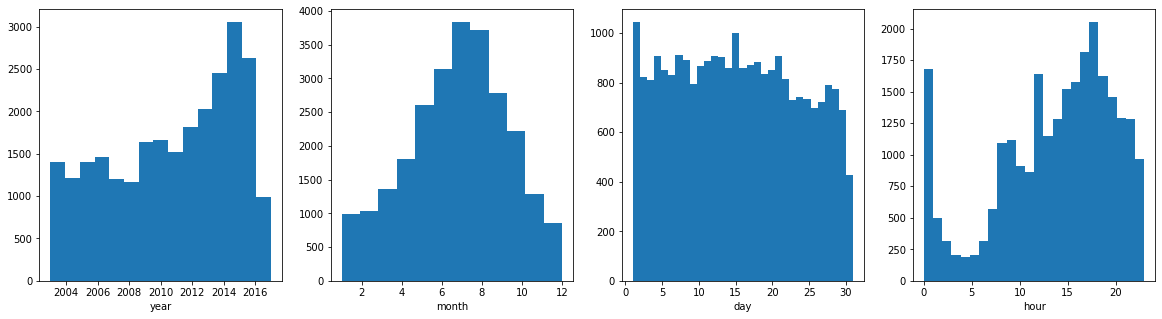

In [8]:
# from now on, focus only on the theft of bicycle
data = data[data.TYPE.str.contains('Theft of Bicycle')]

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

axes[0].hist(data.YEAR, bins = 15)
axes[0].set_xlabel('year')

axes[1].hist(data.MONTH, bins = 12)
axes[1].set_xlabel('month')

axes[2].hist(data.DAY, bins = 31)
axes[2].set_xlabel('day')

axes[3].hist(data.HOUR, bins = 24)
axes[3].set_xlabel('hour')

fig.show()

<class 'collections.Counter'>
dict_keys(['Central Business District', 'Mount Pleasant', 'Riley Park', 'Fairview', 'Kitsilano', 'Arbutus Ridge', 'Grandview-Woodland', 'Strathcona', 'Shaughnessy', 'West End', 'Marpole', 'Hastings-Sunrise', 'Victoria-Fraserview', 'Sunset', 'Dunbar-Southlands', 'Killarney', 'Kensington-Cedar Cottage', 'South Cambie', 'Stanley Park', 'Oakridge', 'Musqueam', 'Kerrisdale', 'Renfrew-Collingwood', 'West Point Grey'])
dict_values([6907, 2746, 621, 3394, 2464, 160, 1403, 1015, 139, 2985, 232, 321, 132, 255, 240, 163, 859, 221, 214, 172, 7, 179, 419, 372])


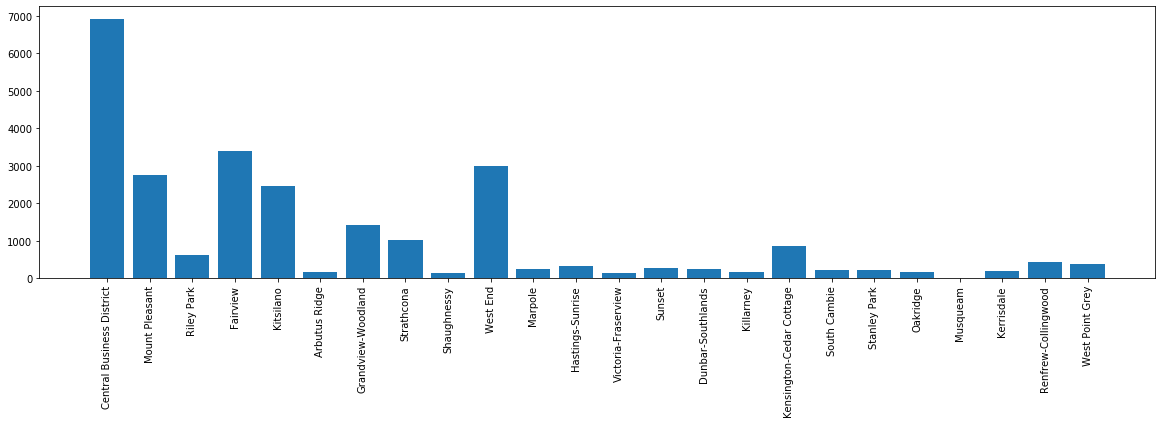

In [9]:
# how many incidents in each neighbourhood
print(type(Counter(data.NEIGHBOURHOOD)))
print(Counter(data.NEIGHBOURHOOD).keys())
print(Counter(data.NEIGHBOURHOOD).values())

plt.figure(figsize = (20,5))
plt.bar(Counter(data.NEIGHBOURHOOD).keys(), Counter(data.NEIGHBOURHOOD).values())
plt.xticks(rotation = 90)
plt.show()

In [10]:
# focus on the rush hour from 6 am to 6 pm, every day, month, year and street
data = data[data.HOUR.isin(range(8,18))]
data.shape

(12969, 12)

## Create interactive maps

The original data set contains coordinates in UTM Zone 10 (columns X and Y) as well as the Latitude and Longitude.

The maps represent only the latest full year (2016) for simplicity.


In [11]:
print(len(data[data.YEAR == 2016]))

m_2 = folium.Map(location = [49.255707, -123.135152], tiles = 'cartodbpositron', zoom_start = 12)

for idx, row in data[data.YEAR == 2016].iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_2)
    
m_2

1296


In [12]:
m_3 = folium.Map(location = [49.255707, -123.135152], tiles = 'stamenterrain', zoom_start = 12)

mc = MarkerCluster()
for idx, row in data[data.YEAR == 2016].iterrows():
    if not math.isnan(row['Latitude']) and not math.isnan(row['Longitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
m_3.add_child(mc)

m_3

In [13]:
m_5 = folium.Map(location = [49.255707, -123.135152], tiles = 'openstreetmap', zoom_start = 12)

HeatMap(data = data[data.YEAR == 2016][['Latitude', 'Longitude']], radius=10).add_to(m_5)

m_5

## Unsupervised machine learning for hotspot analysis 

### Scale latitude and longitude features

In [14]:
print(data.columns)
features = ['Latitude', 'Longitude']
unscaled_features = data[features]
unscaled_features[-2:]

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')


,Latitude,Longitude
530631,49.223775,-123.101070
530639,49.249688,-123.153792


In [15]:
X = StandardScaler().fit_transform(unscaled_features)
X[-2:]

array([[-2.93914372,  0.53586718],
       [-1.30420097, -1.19458107]])

### Train the model with K-means clustering

In [16]:
kmeans = KMeans(n_clusters = 10)
model = kmeans.fit(X)
print("model\n", model)
print(model.labels_)
print(model.labels_.shape)
print((type(model.labels_)))

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[5 5 8 ... 8 7 1]
(12969,)
<class 'numpy.ndarray'>


In [17]:
# show the location of all clusters
centers = model.cluster_centers_
centers

array([[ 1.01232513, -0.3825894 ],
       [-1.967124  , -1.28095251],
       [-0.74581033,  1.56736079],
       [-0.40743801, -2.1008657 ],
       [ 0.60063308,  0.24356583],
       [-0.54851726,  0.22827528],
       [-2.52673602,  2.2638047 ],
       [-2.93082787,  0.19392943],
       [-0.07915246, -0.77562619],
       [ 0.44893352,  1.75868522]])

In [18]:
# how many data points each cluster
Counter(model.labels_)

Counter({5: 1994,
         8: 2119,
         3: 762,
         4: 3378,
         0: 2265,
         9: 719,
         6: 312,
         7: 404,
         1: 282,
         2: 734})

In [19]:
cluster = pd.DataFrame(model.labels_)
cluster

,0
0,5
1,5
2,8
3,3
4,4
...,...
12964,2
12965,0
12966,8
12967,7


In [20]:
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
16589,Theft of Bicycle,2003,8,27,16.0,0.0,W BROADWAY AVE / YUKON ST,Mount Pleasant,491786.42,5456719.02,49.263180,-123.112892
16592,Theft of Bicycle,2003,11,20,15.0,42.0,W 12TH AVE / WILLOW ST,Fairview,491126.78,5456424.81,49.260524,-123.121951
16593,Theft of Bicycle,2003,9,23,15.0,0.0,VINE ST / W 4TH AVE,Kitsilano,488541.86,5457281.44,49.268187,-123.157502
16595,Theft of Bicycle,2003,8,5,14.0,0.0,VINE ST / W 16TH AVE,Arbutus Ridge,488509.45,5456074.81,49.257332,-123.157913
16602,Theft of Bicycle,2003,9,9,11.0,20.0,POWELL ST / WATER ST,Central Business District,492436.24,5458962.47,49.283368,-123.104002
...,...,...,...,...,...,...,...,...,...,...,...,...
530562,Theft of Bicycle,2017,3,1,12.0,0.0,40XX KNIGHT ST,Kensington-Cedar Cottage,494475.96,5455120.78,49.248833,-123.075903
530570,Theft of Bicycle,2017,5,23,12.0,0.0,8XX DUNSMUIR ST,Central Business District,491407.24,5459126.88,49.284834,-123.118155
530581,Theft of Bicycle,2017,2,23,14.0,0.0,22XX W 8TH AVE,Kitsilano,488655.62,5456900.19,49.264759,-123.155928
530631,Theft of Bicycle,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101070


In [21]:
new_index = np.array([x for x in range(0,len(cluster))])
data = data.reset_index()
data

,index,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,16589,Theft of Bicycle,2003,8,27,16.0,0.0,W BROADWAY AVE / YUKON ST,Mount Pleasant,491786.42,5456719.02,49.263180,-123.112892
1,16592,Theft of Bicycle,2003,11,20,15.0,42.0,W 12TH AVE / WILLOW ST,Fairview,491126.78,5456424.81,49.260524,-123.121951
2,16593,Theft of Bicycle,2003,9,23,15.0,0.0,VINE ST / W 4TH AVE,Kitsilano,488541.86,5457281.44,49.268187,-123.157502
3,16595,Theft of Bicycle,2003,8,5,14.0,0.0,VINE ST / W 16TH AVE,Arbutus Ridge,488509.45,5456074.81,49.257332,-123.157913
4,16602,Theft of Bicycle,2003,9,9,11.0,20.0,POWELL ST / WATER ST,Central Business District,492436.24,5458962.47,49.283368,-123.104002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,530562,Theft of Bicycle,2017,3,1,12.0,0.0,40XX KNIGHT ST,Kensington-Cedar Cottage,494475.96,5455120.78,49.248833,-123.075903
12965,530570,Theft of Bicycle,2017,5,23,12.0,0.0,8XX DUNSMUIR ST,Central Business District,491407.24,5459126.88,49.284834,-123.118155
12966,530581,Theft of Bicycle,2017,2,23,14.0,0.0,22XX W 8TH AVE,Kitsilano,488655.62,5456900.19,49.264759,-123.155928
12967,530631,Theft of Bicycle,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101070


In [22]:
# data frames of features and cluster can be joined
data_with_cluster = data.join(cluster)
data_with_cluster = data_with_cluster.rename(columns={0: 'cluster'})
data_with_cluster[-2:]

,index,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,cluster
12967,530631,Theft of Bicycle,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101070,7
12968,530639,Theft of Bicycle,2017,3,15,17.0,0.0,21XX BRIAR AVE,Arbutus Ridge,488807.63,5455224.36,49.249688,-123.153792,1


In [23]:
# map out only the year 2016
clustered_data = data_with_cluster[data_with_cluster.YEAR == 2016].reindex()
clustered_data[:2]

,index,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,cluster
11183,479638,Theft of Bicycle,2016,4,17,8.0,30.0,27XX LAUREL ST,Fairview,490880.68,5456533.90,49.261502,-123.125336,5
11184,479639,Theft of Bicycle,2016,7,15,15.0,0.0,16XX JOHNSTON ST,Fairview,490124.95,5457766.17,49.272574,-123.135753,8


In [24]:
m_4 = folium.Map(location = [49.255707, -123.135152], tiles = 'stamentoner', zoom_start = 12)

def color_producer(val):
    color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    return color[val]

for i in range(0, len(clustered_data) ):
    Circle(location = [ clustered_data.iloc[i]['Latitude'], clustered_data.iloc[i]['Longitude'] ], radius = 20,
        color = color_producer(clustered_data.iloc[i]['cluster'])).add_to(m_4)

m_4